# Food Panda Restaurant Analysis

## Introduction

Welcome to this Jupyter Notebook where we'll be exploring and analyzing a dataset related to Food Panda, a popular food delivery platform. The dataset contains information about various restaurants, including their budget, location (latitude and longitude), name, rating, review number, city, and main cuisine.

### Objective

The goal of this analysis is to gain insights into the characteristics of the restaurants available on Food Panda. We'll explore the dataset, perform exploratory data analysis (EDA), and create visualizations to better understand the distribution of ratings, budget levels, geographical distribution of restaurants, and more.

### Dataset Overview

Let's begin by loading the dataset and taking a quick look at its structure:

## Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Dataset

In [5]:
df=pd.read_csv("foodpanda")
df.head()

,budget,latitude,longitude,name,rating,review_number,city,main_cuisine
0,2,24.901243,67.200907,Roll N Roll,3.8,82,karachi,fast food
1,2,24.893939,67.058118,Crispiest Fast Food,1.0,3,karachi,fast food
2,1,24.902181,67.067199,H pro pizza and fastfood,3.5,95,karachi,pizza
3,3,24.868921,67.059357,Imperial Court Chinese Restaurant,4.2,1187,karachi,chinese
4,2,24.904414,67.068519,Aslam Nihari & Bar B Q Fast Food,3.9,83,karachi,pakistani


## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10289 entries, 0 to 10288
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         10289 non-null  int64  
 1   latitude       10289 non-null  float64
 2   longitude      10289 non-null  float64
 3   name           10289 non-null  object 
 4   rating         10289 non-null  float64
 5   review_number  10289 non-null  int64  
 6   city           10289 non-null  object 
 7   main_cuisine   10289 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 643.2+ KB


In [8]:
df.describe()

,budget,latitude,longitude,rating,review_number
count,10289.000000,10289.000000,10289.000000,10289.000000,10289.000000
mean,1.709107,29.636595,71.249036,3.683536,568.385071
std,0.749699,3.508557,3.176836,0.834539,1450.528198
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.938720,67.116133,3.500000,27.000000
50%,2.000000,31.434075,73.038175,3.900000,120.000000
75%,2.000000,32.097334,74.251335,4.100000,498.000000
max,3.000000,34.238546,74.591446,5.000000,37994.000000


In [9]:
df.describe(include='object')

,name,city,main_cuisine
count,10289,10289,10289
unique,9922,27,34
top,Karachi Naseeb Biryani,karachi,pakistani
freq,7,3201,3893


In [10]:
df.shape

(10289, 8)

In [11]:
df["main_cuisine"].unique()

array(['fast food', 'pizza', 'chinese', 'pakistani', 'healthy food',
       'beverages', 'cakes & bakery', 'desserts', 'burgers', 'savouries',
       'italian', 'biryani', 'pulao', 'sandwiches', 'thai', 'japanese',
       'tea & coffee', 'bbq', 'continental', 'american', 'dumpling',
       'shawarma', 'middle eastern', 'fried chicken', 'seafood', 'indian',
       'mexican', 'steak', 'western', 'lebanese', 'mediterranean',
       'turkish', 'southeast asian', 'wraps & rolls'], dtype=object)

In [12]:
df.isnull().sum()

budget           0
latitude         0
longitude        0
name             0
rating           0
review_number    0
city             0
main_cuisine     0
dtype: int64

In [13]:
df["budget"].unique()

array([2, 1, 3], dtype=int64)

In [14]:
df["budget"].dtype

dtype('int64')

In [15]:
df["latitude"].dtype

dtype('float64')

In [16]:
for i in df.columns:
    print(i, ":", df[i].dtype)

budget : int64
latitude : float64
longitude : float64
name : object
rating : float64
review_number : int64
city : object
main_cuisine : object


## Rating Distribution

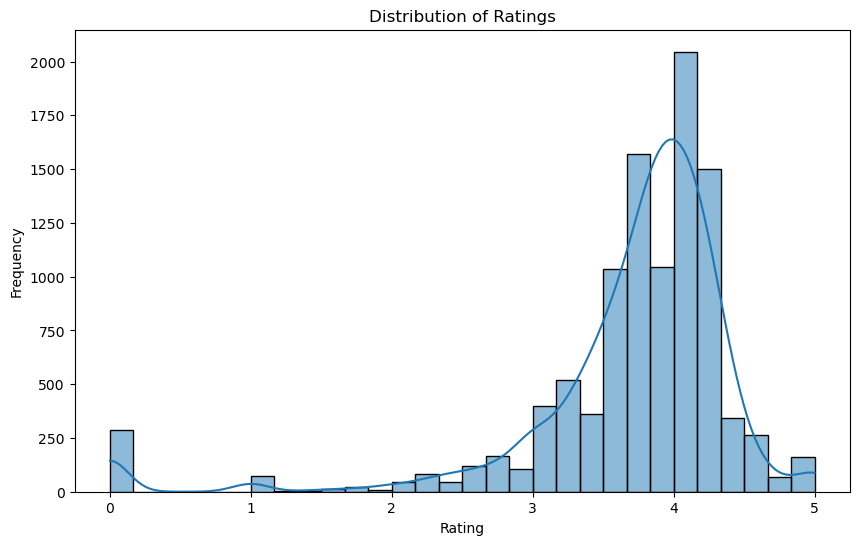

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Data Correlation

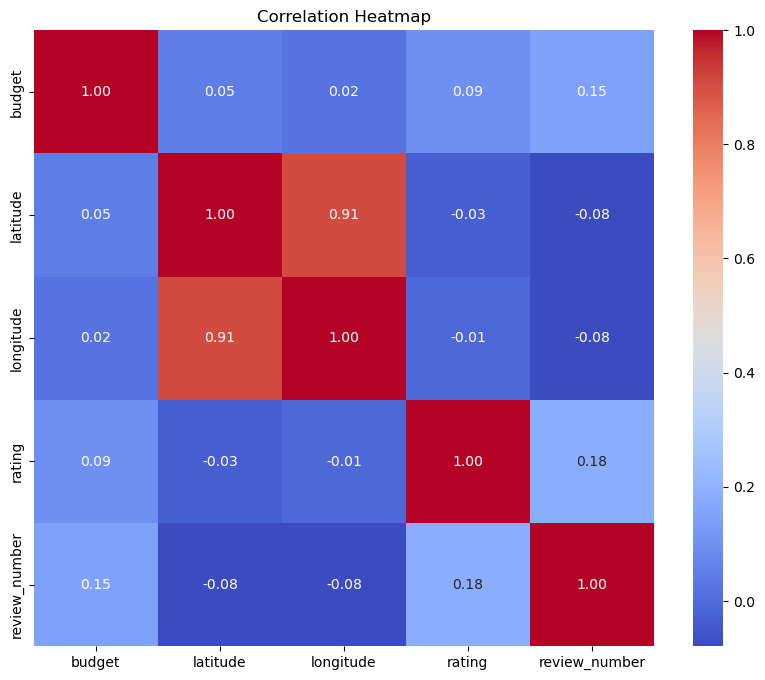

In [20]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Scatter Plot

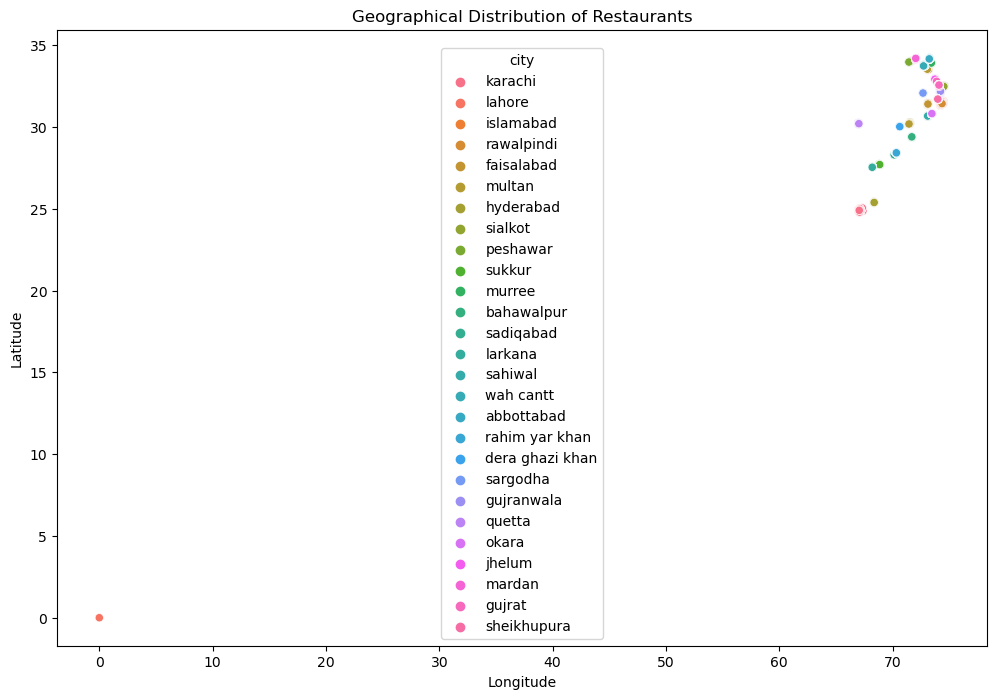

In [21]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='city', data=df)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Count Plot

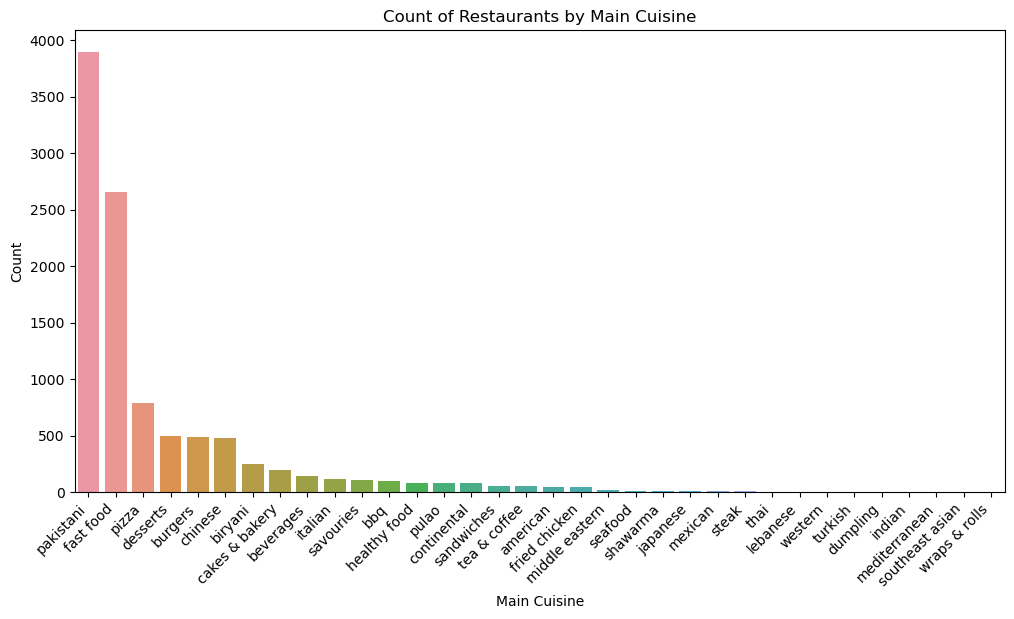

In [22]:
# Count plot of main cuisine types
plt.figure(figsize=(12, 6))
sns.countplot(x='main_cuisine', data=df, order=df['main_cuisine'].value_counts().index)
plt.title('Count of Restaurants by Main Cuisine')
plt.xlabel('Main Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()